In [1]:
#import relevant libraries 
import pandas as pd
import numpy as np
import math

# load csv file from data_file.csv
position_data = pd.read_csv("data_file.csv") 
print(position_data.head(10))

# assign coordinates to variables
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# declare cordinates of base stations
BS_1 = (-1, -1)
BS_2 = (56325, 9)

# calculate the distance between car i and car j
dis_car_ij = np.zeros((len(coordinate_x),len(coordinate_x)))
rate_car_ij = np.zeros((len(coordinate_x),len(coordinate_x)))
for i in range(len(coordinate_x)):
    for j in range(len(coordinate_x)):
        dis_car_ij[i][j] = math.sqrt((abs(coordinate_x[i] - coordinate_x[j])) ** 2 + (abs(coordinate_y[i] - coordinate_y[j])) ** 2)

        # Here is to calculate the transmission rate according to the distance
        if dis_car_ij[i][j] < 500:
            rate_car_ij[i][j] = 10
        elif dis_car_ij[i][j] >= 500 and dis_car_ij[i][j] < 1000:
            rate_car_ij[i][j] = 8
        elif dis_car_ij[i][j] >= 1000 and dis_car_ij[i][j] < 2000:
            rate_car_ij[i][j] = 6
        elif dis_car_ij[i][j] >= 2000 and dis_car_ij[i][j] < 3000:
            rate_car_ij[i][j] = 4
        elif dis_car_ij[i][j] >= 3000 and dis_car_ij[i][j] < 4000:
            rate_car_ij[i][j] = 2
        elif dis_car_ij[i][j] >= 4000 and dis_car_ij[i][j] < 6000:
            rate_car_ij[i][j] = 1
        elif dis_car_ij[i][j] >= 6000:
            rate_car_ij[i][j] = 0
print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in dis_car_ij]))

print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in rate_car_ij]))

   No.            x         y
0    1     0.000000  8.157657
1    2  1400.124877  6.107682
2    3  3300.805188  4.148334
3    4  3701.634008  6.147944
4    5  4102.583249  6.088959
5    6  4202.800929  4.170082
6    7  4803.101556  2.098907
7    8  5603.688004  6.189632
8    9  6403.874407  6.159558
9   10  8104.029001  6.026609
 0.0   1400.1263777213621   3300.807622960825   3701.63455356241   4102.583770562924   4202.802820684817   4803.1053773261165   5603.688349586997   6403.874718717556   8104.0292811918025   9504.178987240859   9604.929731832699   9705.071935395403   9805.88066161424   10806.545970189169   11607.34896006512   12107.374967781041   13208.085210010335   14708.956147688472   16709.05924351327   16809.797355154144   17810.47607844315   18110.51168602089   19410.588227336564   19710.820883855682   21611.35134280455   23011.967945791275   23512.202377935984   24912.2397426759   25912.74698523473   27913.60860027348   28414.368351960795   30015.044813499637   31715.630740

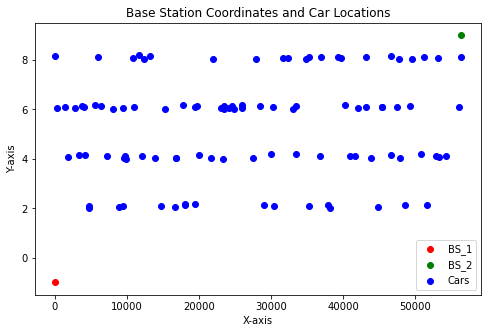

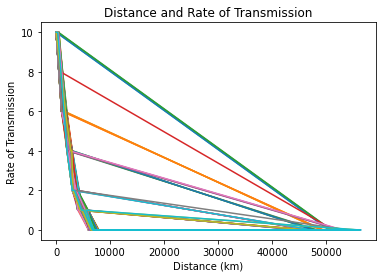

In [2]:
#import relevant library
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the base station coordinates
plt.scatter(BS_1[0], BS_1[1], label='BS_1', color='red')
plt.scatter(BS_2[0], BS_2[1], label='BS_2', color='green')

# Add the car coordinates
plt.scatter(coordinate_x, coordinate_y, label='Cars', color='blue')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Base Station Coordinates and Car Locations')
plt.legend()

# Show the plot
plt.show()

# Create a line plot of distance vs transmission rate
plt.plot(dis_car_ij, rate_car_ij)

# Add title and labels
plt.title('Distance and Rate of Transmission')
plt.xlabel('Distance (km)')
plt.ylabel('Rate of Transmission')

# Show the plot
plt.show()

## Implementation of Algorithm

In [3]:
#import relevant library
import random

# Constants for GA
POPULATION_SIZE = 100
NUM_GENERATIONS = 100
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.2

# Combined Fitness function
def fitness(route):
    total_latency = len(route) - 1  # Latency is based on the number of cars in the route (assuming 1 unit car = 50ms)
    total_transmission_rate = 0

    # Check if the route is not empty
    if not route:
        return float('inf'), 0

    for i in range(len(route) - 1):
        rate = rate_car_ij[route[i]][route[i + 1]]
        if rate == 0:  # No connection
            return float('inf'), 0
        total_transmission_rate += rate

    # Ensure the route connects to either BS1 or BS2
    last_car = route[-1]
    rate_to_bs1 = rate_car_ij[last_car][0]  # Assuming the first coordinate is BS1
    rate_to_bs2 = rate_car_ij[last_car][-1]  # Assuming the last coordinate is BS2

    # Choose the base station with the higher transmission rate
    last_rate = max(rate_to_bs1, rate_to_bs2)

    # Penalize the route if it does not connect to BS1 or BS2
    if last_rate == 0:
        return float('inf'), 0

    # Combine total latency and total transmission rate (considering both latency and transmission rate)
    combined_fitness = total_latency + total_transmission_rate
    return combined_fitness,

# Create initial population
def create_individual():
    individual = list(range(len(coordinate_x)))
    random.shuffle(individual)
    return individual

# Tournament Selection
def tournament_selection(population, fitnesses, k):
    selected = []
    for _ in range(k):
        contenders = random.sample(list(zip(population, fitnesses)), 3)
        winner = max(contenders, key=lambda x: x[1])
        selected.append(winner[0])
    return selected

# One-Point Crossover
def one_point_crossover(parent1, parent2):
    size = min(len(parent1), len(parent2))
    crossover_point = random.randint(1, size - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Swap Mutation
def swap_mutation(individual):
    size = len(individual)
    if size < 2:
        return individual
    idx1, idx2 = random.sample(range(size), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Initialize population
population = [create_individual() for _ in range(POPULATION_SIZE)]

# Lists to store best routes for each generation
best_routes_history = []

In [4]:
# Code for Running the Experiments and Results with Genetic Algorithm:

# Constants for GA
POPULATION_SIZE = 100
NUM_GENERATIONS = 100
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.2

# Load csv file from data_file.csv
position_data = pd.read_csv("data_file.csv")
#print(position_data.head(10))

# Assign coordinates to variables
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# Declare coordinates of base stations
BS_1 = (-1, -1)
BS_2 = (56325, 9)

# Calculate the distance between car i and car j
dis_car_ij = np.zeros((len(coordinate_x), len(coordinate_x)))
rate_car_ij = np.zeros((len(coordinate_x), len(coordinate_x)))

for i in range(len(coordinate_x)):
    for j in range(len(coordinate_x)):
        dis_car_ij[i][j] = math.sqrt((abs(coordinate_x[i] - coordinate_x[j])) ** 2 + (abs(coordinate_y[i] - coordinate_y[j])) ** 2)

        # Calculate the transmission rate according to the distance
        if dis_car_ij[i][j] < 500:
            rate_car_ij[i][j] = 10
        elif 500 <= dis_car_ij[i][j] < 1000:
            rate_car_ij[i][j] = 8
        elif 1000 <= dis_car_ij[i][j] < 2000:
            rate_car_ij[i][j] = 6
        elif 2000 <= dis_car_ij[i][j] < 3000:
            rate_car_ij[i][j] = 4
        elif 3000 <= dis_car_ij[i][j] < 4000:
            rate_car_ij[i][j] = 2
        elif 4000 <= dis_car_ij[i][j] < 6000:
            rate_car_ij[i][j] = 1
        elif dis_car_ij[i][j] >= 6000:
            rate_car_ij[i][j] = 0

# Combined Fitness function
def fitness(route):
    total_latency = len(route) - 1  # Latency is based on the number of cars in the route (assuming 1 unit car = 50ms)
    total_transmission_rate = 0

    # Check if the route is not empty
    if not route:
        return float('inf'), 0

    for i in range(len(route) - 1):
        rate = rate_car_ij[route[i]][route[i + 1]]
        if rate == 0:  # No connection
            return float('inf'), 0
        total_transmission_rate += rate

    # Ensure the route connects to either BS1 or BS2
    last_car = route[-1]
    rate_to_bs1 = rate_car_ij[last_car][0]  # Assuming the first coordinate is BS1
    rate_to_bs2 = rate_car_ij[last_car][-1]  # Assuming the last coordinate is BS2

    # Choose the base station with the higher transmission rate
    last_rate = max(rate_to_bs1, rate_to_bs2)

    # Penalize the route if it does not connect to BS1 or BS2
    if last_rate == 0:
        return float('inf'), 0

    # Combine total latency and total transmission rate (considering both latency and transmission rate)
    combined_fitness = total_latency + total_transmission_rate
    return combined_fitness,

# Create initial population
def create_individual():
    individual = list(range(len(coordinate_x)))
    random.shuffle(individual)
    return individual

# Tournament Selection
def tournament_selection(population, fitnesses, k):
    selected = []
    for _ in range(k):
        contenders = random.sample(list(zip(population, fitnesses)), 3)
        winner = max(contenders, key=lambda x: x[1])
        selected.append(winner[0])
    return selected

# One-Point Crossover
def one_point_crossover(parent1, parent2):
    size = min(len(parent1), len(parent2))
    crossover_point = random.randint(1, size - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Swap Mutation
def swap_mutation(individual):
    size = len(individual)
    if size < 2:
        return individual
    idx1, idx2 = random.sample(range(size), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Initialize population
population = [create_individual() for _ in range(POPULATION_SIZE)]

# Lists to store best routes for each generation
best_routes_history = []

# Genetic Algorithm Process
for generation in range(NUM_GENERATIONS):
    # Evaluate fitness
    fitnesses = [fitness(ind) for ind in population]

    # Print the best route for the current generation
    best_route = min(population, key=fitness)
    last_car = best_route[-1]
    if rate_car_ij[last_car][0] > rate_car_ij[last_car][-1]:
        print(f"Generation {generation + 1}: Best Route {best_route}, Fitness {fitness(best_route)}, Connects to BS1")
    else:
        print(f"Generation {generation + 1}: Best Route {best_route}, Fitness {fitness(best_route)}, Connects to BS2")

    # Ensure the last car in the best route connects to the base station with higher transmission rate
    if rate_car_ij[last_car][0] > rate_car_ij[last_car][-1]:
        best_route[-1] = 0  # Connect to BS1
    else:
        best_route[-1] = len(coordinate_x) - 1  # Connect to BS2

    # Store the best route for this generation
    best_routes_history.append(best_route)

    # Tournament selection
    selected = tournament_selection(population, fitnesses, POPULATION_SIZE)

    # Crossover and mutation
    offspring = []
    for i in range(0, POPULATION_SIZE, 2):
        parent1, parent2 = selected[i], selected[i+1]
        if random.random() < CROSSOVER_RATE:
            child1, child2 = one_point_crossover(parent1, parent2)
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])

    for ind in offspring:
        if random.random() < MUTATION_RATE:
            swap_mutation(ind)

    # Create new generation
    population = offspring

# Find the best route in the final generation
final_best_route = min(population, key=fitness)

# Ensure the last car in the final best route connects to the base station with higher transmission rate
last_car_final = final_best_route[-1]
if rate_car_ij[last_car_final][0] > rate_car_ij[last_car_final][-1]:
    final_best_route[-1] = 0  # Connect to BS1
else:
    final_best_route[-1] = len(coordinate_x) - 1  # Connect to BS2

print(f"\nFinal Best Route: {final_best_route}, Fitness {fitness(final_best_route)}")

Generation 1: Best Route [12, 9, 2, 99, 98, 15, 90, 37, 14, 50, 68, 63, 11, 40, 73, 81, 49, 8, 39, 28, 0, 38, 5, 41, 92, 35, 1, 31, 65, 91, 62, 93, 20, 7, 30, 70, 85, 4, 79, 46, 25, 29, 97, 78, 32, 67, 60, 54, 47, 61, 42, 44, 19, 51, 75, 57, 48, 16, 6, 71, 3, 17, 36, 27, 23, 18, 94, 64, 82, 33, 43, 53, 89, 86, 10, 88, 13, 77, 45, 58, 72, 21, 55, 56, 52, 96, 95, 59, 84, 26, 83, 22, 87, 69, 80, 24, 66, 34, 76, 74], Fitness (inf, 0), Connects to BS2
Generation 2: Best Route [72, 17, 63, 21, 13, 31, 59, 12, 80, 76, 82, 48, 7, 47, 68, 61, 78, 28, 93, 43, 12, 75, 79, 34, 60, 95, 17, 82, 71, 99, 57, 14, 25, 58, 8, 24, 6, 39, 35, 38, 27, 69, 20, 36, 9, 11, 89, 77, 29, 97, 28, 94, 18, 59, 68, 76, 4, 78, 3, 80, 46, 74, 51, 33, 88, 52, 22, 67, 93, 61, 40, 96, 44, 90, 87, 83, 54, 10, 48, 45, 50, 13, 49, 26, 0, 31, 32, 43, 30, 66, 19, 15, 63, 37, 98, 16, 62, 85, 70, 56], Fitness (inf, 0), Connects to BS2
Generation 3: Best Route [51, 70, 48, 43, 41, 61, 35, 98, 52, 88, 37, 95, 76, 59, 49, 46, 30, 3

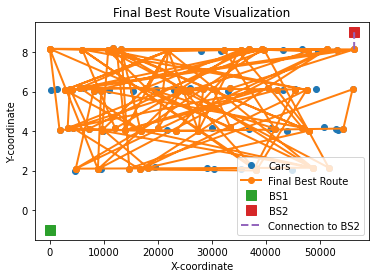

In [5]:
# Create a function to visualize the optimal paths for Genetic Algorithm

# Plot the best route
best_route_x = [coordinate_x[i] for i in final_best_route]
best_route_y = [coordinate_y[i] for i in final_best_route]

plt.plot(coordinate_x, coordinate_y, 'o', label='Cars')
plt.plot(best_route_x, best_route_y, '-o', label='Final Best Route', linewidth=2)  # Connect the final best route
plt.plot(BS_1[0], BS_1[1], 's', label='BS1', markersize=10)
plt.plot(BS_2[0], BS_2[1], 's', label='BS2', markersize=10)

# Connect the last car in the final best route to BS1 or BS2
if rate_car_ij[last_car_final][0] > rate_car_ij[last_car_final][-1]:
    plt.plot([coordinate_x[last_car_final], BS_1[0]], [coordinate_y[last_car_final], BS_1[1]], '--', label='Connection to BS1', linewidth=2)
else:
    plt.plot([coordinate_x[last_car_final], BS_2[0]], [coordinate_y[last_car_final], BS_2[1]], '--', label='Connection to BS2', linewidth=2)

plt.legend()
plt.title('Final Best Route Visualization')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

In [6]:
# Code for Running Another Experiment with a different fitness function and Results with Genetic Algorithm:


import numpy as np
import pandas as pd
import math
import random

# Load CSV file
position_data = pd.read_csv("data_file.csv")
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# Base station coordinates
BS_1 = (-1, -1)
BS_2 = (56325, 9)

# Calculate distance matrix
dis_car_ij = np.zeros((len(coordinate_x), len(coordinate_x)))
rate_car_ij = np.zeros((len(coordinate_x), len(coordinate_x)))

for i in range(len(coordinate_x)):
    for j in range(len(coordinate_x)):
        dis_car_ij[i][j] = math.sqrt((abs(coordinate_x[i] - coordinate_x[j])) ** 2 +
                                     (abs(coordinate_y[i] - coordinate_y[j])) ** 2)

        # Calculate the transmission rate according to the distance
        if dis_car_ij[i][j] < 500:
            rate_car_ij[i][j] = 10
        elif 500 <= dis_car_ij[i][j] < 1000:
            rate_car_ij[i][j] = 8
        elif 1000 <= dis_car_ij[i][j] < 2000:
            rate_car_ij[i][j] = 6
        elif 2000 <= dis_car_ij[i][j] < 3000:
            rate_car_ij[i][j] = 4
        elif 3000 <= dis_car_ij[i][j] < 4000:
            rate_car_ij[i][j] = 2
        elif 4000 <= dis_car_ij[i][j] < 6000:
            rate_car_ij[i][j] = 1
        elif dis_car_ij[i][j] >= 6000:
            rate_car_ij[i][j] = 0

# Genetic Algorithm Parameters
population_size = 50
generations = 100

# Function to calculate fitness of a route
def calculate_fitness(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += dis_car_ij[route[i]][route[i + 1]]
    return 1 / total_distance  # Fitness is inversely proportional to distance

# Initialize population
population = [list(np.random.permutation(len(coordinate_x))) for _ in range(population_size)]

# Main GA loop
for generation in range(generations):
    # Evaluate fitness of each individual in the population
    fitness_scores = [calculate_fitness(route) for route in population]

    # Select top 50% of individuals based on fitness
    selected_indices = np.argsort(fitness_scores)[-population_size // 2:]
    selected_population = [population[i] for i in selected_indices]

    # Crossover: Use order crossover (OX)
    offspring_population = []
    for i in range(0, population_size // 2, 2):
        parent1, parent2 = selected_population[i % (population_size // 2)], selected_population[(i + 1) % (population_size // 2)]
        crossover_point1, crossover_point2 = sorted(random.sample(range(len(coordinate_x)), 2))
        child1 = [-1] * len(coordinate_x)
        child2 = [-1] * len(coordinate_x)
        child1[crossover_point1:crossover_point2] = parent1[crossover_point1:crossover_point2]
        child2[crossover_point1:crossover_point2] = parent2[crossover_point1:crossover_point2]

        remaining1 = [gene for gene in parent2 if gene not in child1]
        remaining2 = [gene for gene in parent1 if gene not in child2]
        child1[:crossover_point1], child1[crossover_point2:] = remaining1[:crossover_point1], remaining1[crossover_point1:]
        child2[:crossover_point1], child2[crossover_point2:] = remaining2[:crossover_point1], remaining2[crossover_point1:]

        offspring_population.extend([child1, child2])

    # Mutation: Swap two random positions in each individual
    mutation_rate = 0.1
    for i in range(population_size):
        if random.random() < mutation_rate:
            mutation_points = random.sample(range(len(coordinate_x)), 2)
            population[i][mutation_points[0]], population[i][mutation_points[1]] = \
                population[i][mutation_points[1]], population[i][mutation_points[0]]

    # Find the best route in the current population
    final_best_route_index = np.argmax(fitness_scores)
    final_best_route = population[final_best_route_index]

    # Print the number of the best route in the current generation
    print(f"Generation {generation + 1}: Best Route {final_best_route_index + 1}, Fitness: {fitness_scores[final_best_route_index]}")

# Find the best route in the final population
final_best_route_index = np.argmax([calculate_fitness(route) for route in population])
final_best_route = population[final_best_route_index]

print("\nFinal Best Route:", final_best_route)
print("Final Best Route Fitness:", calculate_fitness(final_best_route))

Generation 1: Best Route 31, Fitness: 5.953791753623145e-07
Generation 2: Best Route 31, Fitness: 5.953791753623145e-07
Generation 3: Best Route 31, Fitness: 5.953791753623145e-07
Generation 4: Best Route 31, Fitness: 5.966565177965546e-07
Generation 5: Best Route 31, Fitness: 5.966565177965546e-07
Generation 6: Best Route 31, Fitness: 5.966565171301021e-07
Generation 7: Best Route 31, Fitness: 5.966565171301021e-07
Generation 8: Best Route 31, Fitness: 5.966565171301021e-07
Generation 9: Best Route 31, Fitness: 6.037213108853187e-07
Generation 10: Best Route 31, Fitness: 6.037213108853187e-07
Generation 11: Best Route 31, Fitness: 6.037213108853187e-07
Generation 12: Best Route 31, Fitness: 6.019017251825702e-07
Generation 13: Best Route 31, Fitness: 6.019017251825702e-07
Generation 14: Best Route 31, Fitness: 6.019017251825702e-07
Generation 15: Best Route 31, Fitness: 6.019017251825702e-07
Generation 16: Best Route 31, Fitness: 6.019017251825702e-07
Generation 17: Best Route 31, Fit